<a href="https://colab.research.google.com/github/Raphael181/Raphael181/blob/main/NYC_taxifare_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt 
import os
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df  = pd.read_csv('/content/drive/MyDrive/NYC_dataset/new-york-city-taxi-fare-prediction/NYC_taxi.csv', parse_dates = ['pickup_datetime'], nrows = 500000)

In [ ]:
print(df.head())

                             key  ...  passenger_count
0    2009-06-15 17:26:21.0000001  ...                1
1    2010-01-05 16:52:16.0000002  ...                1
2   2011-08-18 00:35:00.00000049  ...                2
3    2012-04-21 04:30:42.0000001  ...                1
4  2010-03-09 07:51:00.000000135  ...                1

[5 rows x 8 columns]


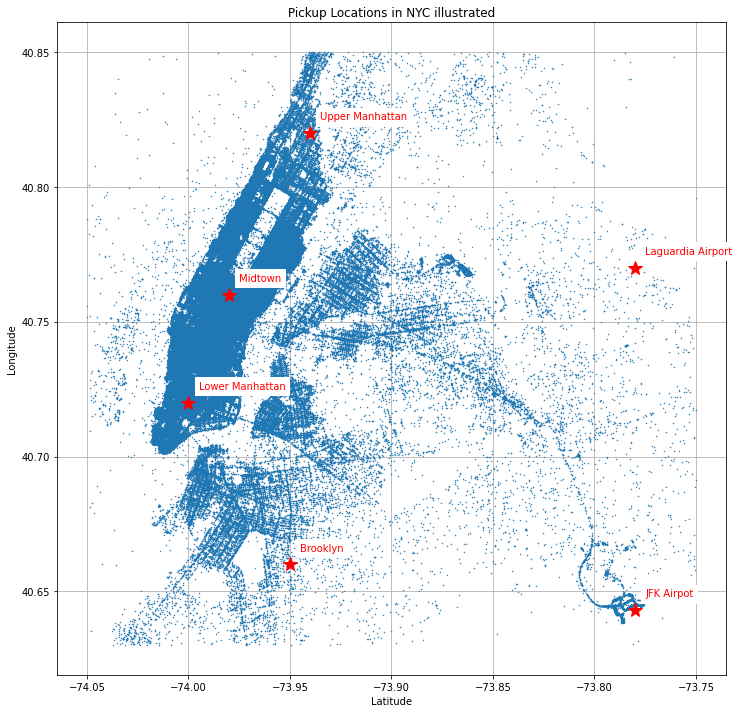

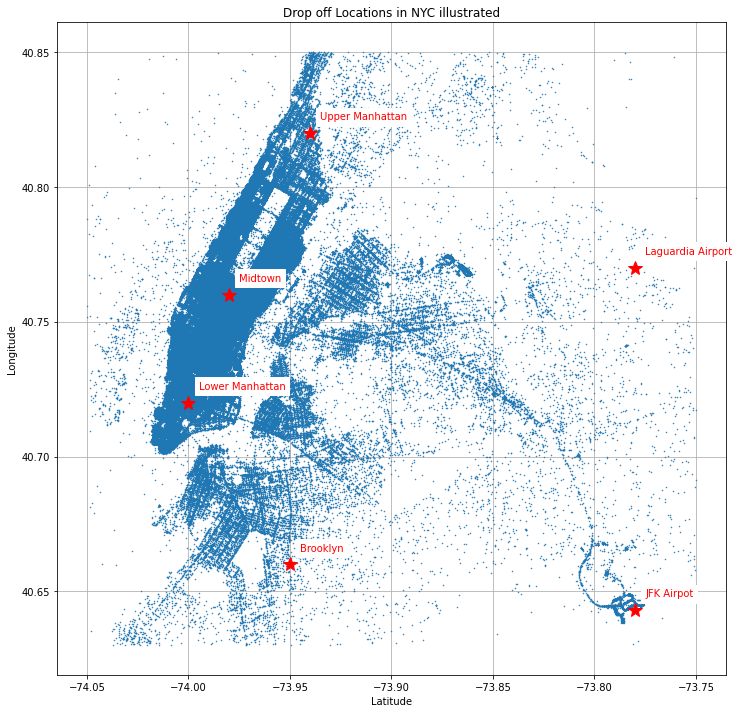

In [ ]:
#restric data to only pickups and dropoffs in NYC

#range of longitude for NYC
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75

#range of latitude for NYC
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85

df2 = df.copy(deep= True)

for long in ['pickup_longitude', 'dropoff_longitude']:
  df2 = df2[(df2[long] > nyc_min_longitude) & (df2[long] < nyc_max_longitude)]
for lat in ['pickup_latitude', 'dropoff_latitude']:
  df2 = df2[(df2[lat] > nyc_min_latitude) & (df2[lat] < nyc_max_latitude)]

#A function that will take our DataFrame as input and plot the pickup locations as a scatterplot
landmarks = {'JFK Airpot': (-73.78, 40.643),
             'Laguardia Airport': (-73.78, 40.77),
             'Midtown' : (-73.98, 40.76),
             'Lower Manhattan': (-74.00, 40.72),
             'Upper Manhattan': (-73.94, 40.82),
             'Brooklyn': (-73.95, 40.66)
             }

#plot the locations on a scatterplot
def plot_lat_long(df, landmarks, points = "Pickup"):
  plt.figure(figsize= (12,12))
  if points == 'pickup':
    plt.plot(list(df.pickup_longitude), list(df.pickup_latitude), '.' , markersize = 1)
  else:
    plt.plot(list(df.dropoff_longitude), list(df.dropoff_latitude), '.' , markersize = 1)

  for landmark in landmarks:
    plt.plot(landmarks[landmark][0], landmarks[landmark][1], '*', markersize = 15, alpha = 1, color = 'r')
    plt.annotate(landmark, (landmarks[landmark][0] + 0.005, landmarks[landmark][1] + 0.005), color = 'r', backgroundcolor = 'w')

  plt.title(f"{points} Locations in NYC illustrated" )
  plt.grid(None)
  plt.xlabel('Latitude')
  plt.ylabel('Longitude')
  plt.show()

plot_lat_long(df2, landmarks, points = "Pickup")
plot_lat_long(df2, landmarks, points= 'Drop off')

In [ ]:
#how does the number of rides vary by day and hour

#seperate the pickupyear, month, day, day of the week and hour
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour

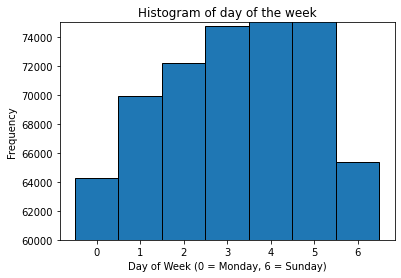

In [ ]:
#plot a histogram to show the distribution of rides dudring the week
import numpy as np
df['day_of_week'].plot.hist(bins = np.arange(8) - 0.5, ec = 'black', ylim = (60000,75000))
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.title("Histogram of day of the week")
plt.show()

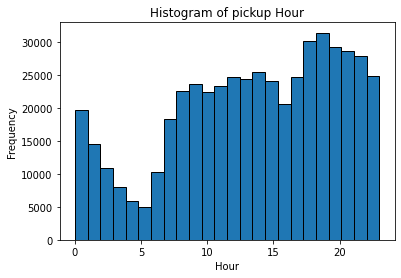

In [ ]:
#Ridership by the hour
df['hour'].plot.hist(bins = 24, ec = 'black')
plt.title('Histogram of pickup Hour')
plt.xlabel('Hour')
plt.show()

In [ ]:
#Data preprocessing
#Check for null values
print(df.isnull(). sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64


In [ ]:
#drop thr missing data since it is very small
df = df.dropna()

In [ ]:
#check if there are outliers
print(df.describe())

         fare_amount  pickup_longitude  ...    day_of_week           hour
count  499995.000000     499995.000000  ...  499995.000000  499995.000000
mean       11.358182        -72.520091  ...       3.042020      13.510843
std         9.916069         11.856446  ...       1.949243       6.511596
min       -44.900000      -2986.242495  ...       0.000000       0.000000
25%         6.000000        -73.992047  ...       1.000000       9.000000
50%         8.500000        -73.981785  ...       3.000000      14.000000
75%        12.500000        -73.967117  ...       5.000000      19.000000
max       500.000000       2140.601160  ...       6.000000      23.000000

[8 rows x 11 columns]


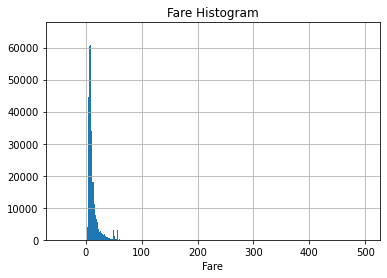

In [ ]:
#plot a histogram to understand the distribution of fares
df['fare_amount'].hist(bins = 500)
plt.xlabel("Fare")
plt.title("Fare Histogram")
plt.show()

In [ ]:
#Remove rows with fares less than zero and greater than 100
df = df[(df['fare_amount'] >= 0) & (df['fare_amount'] <= 100)]

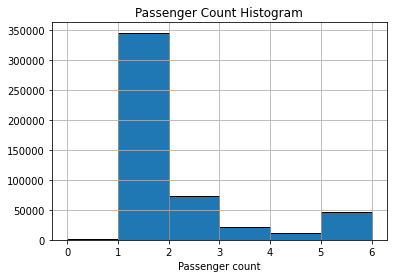

In [ ]:
#plotting a histogram of passenger count

df['passenger_count'].hist(bins = 6, ec = 'black')
plt.xlabel('Passenger count')
plt.title("Passenger Count Histogram")
plt.show()

In [ ]:
#Replace the outliers with the mode instead of discarding
df.loc[df['passenger_count'] == 0 , 'passenger_count'] = 1

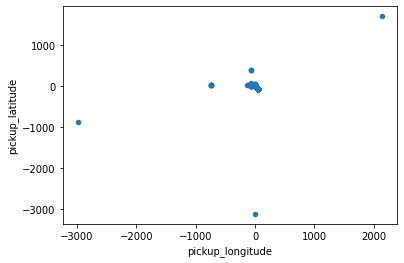

In [ ]:
#check our pickup and dropoff longitude and latitude data for outliers using scatterplot
df.plot.scatter('pickup_longitude', 'pickup_latitude')
plt.show()

In [ ]:
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75

#range of latitude for NYC
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85

for long in ['pickup_longitude', 'dropoff_longitude']:
  df = df[(df[long] > nyc_min_longitude) & (df[long] < nyc_max_longitude)]
for lat in ['pickup_latitude', 'dropoff_latitude']:
  df = df[(df[lat] > nyc_min_latitude) & (df[lat] < nyc_max_latitude)]

In [ ]:
#Feature Engineering
print(df.loc[:5,['pickup_datetime', 'year', 'month', 'day', 'day_of_week', 'hour']])

            pickup_datetime  year  month  day  day_of_week  hour
0 2009-06-15 17:26:21+00:00  2009      6   15            0    17
1 2010-01-05 16:52:16+00:00  2010      1    5            1    16
2 2011-08-18 00:35:00+00:00  2011      8   18            3     0
3 2012-04-21 04:30:42+00:00  2012      4   21            5     4
4 2010-03-09 07:51:00+00:00  2010      3    9            1     7
5 2011-01-06 09:50:45+00:00  2011      1    6            3     9


In [ ]:
#Drop the pickup_datetime column
df = df.drop(['pickup_datetime'], axis = 1)

In [ ]:
#create a function that can determine the distance between any two points
def euc_distance(lat1, long1, lat2, long2):
  return (((lat1 - lat2)**2 + (long1 - long2) ** 2) ** 0.5)

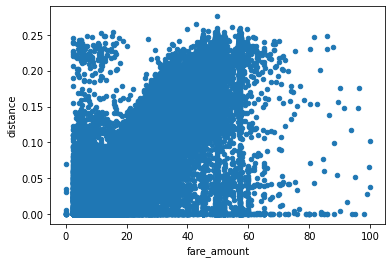

In [ ]:
#apply the function to our dataframe
df['distance'] = euc_distance(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])
df.plot.scatter('fare_amount', 'distance')
plt.show()

In [ ]:
#calculating thes distance of pickup and dropoff for the three major cities
airports = {
    'JFK_Airport' : (-73.78, 40.643),
    'Laguardia_Airport':(-73.87, 40.77),
    'Newark_Airport': (-74.18, 40.69)
}

for airport in airports:
  df['pickup_dist_' + airport] = euc_distance(df['pickup_latitude'], df['pickup_longitude'], airports[airport][1], airports[airport][0])

  df['dropoff_dist_' + airport] = euc_distance(df['dropoff_latitude'], df['dropoff_longitude'], airports[airport][1], airports[airport][0])

In [ ]:
#Checking if the euc_distance is functioning as expected by printing out some rows
print(df[['key', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_dist_JFK_Airport', 'dropoff_dist_JFK_Airport']].head())

                             key  ...  dropoff_dist_JFK_Airport
0    2009-06-15 17:26:21.0000001  ...                  0.092710
1    2010-01-05 16:52:16.0000002  ...                  0.242961
2   2011-08-18 00:35:00.00000049  ...                  0.237050
3    2012-04-21 04:30:42.0000001  ...                  0.240846
4  2010-03-09 07:51:00.000000135  ...                  0.225878

[5 rows x 7 columns]


In [ ]:
df = df.drop(['key'], axis = 1)

In [ ]:
#Scaling our features before passing them to the neural Network
#Keep a copy of the prescaled dataframe
df_prescaled = df.copy()

In [ ]:
#we don't want to modify the fare amount, so we drop it
df_scaled = df.drop(['fare_amount'], axis = 1)

#scale the features by using the scaling function from scikit learn
from sklearn.preprocessing import scale
df_scaled = scale(df_scaled)

#convert the object returned by the scale() function into a pandas Dataframe and concatenate the fare_amount column back
cols = df.columns.tolist()
cols.remove('fare_amount')
df_scaled = pd.DataFrame(df_scaled, columns= cols, index = df.index)
df_scaled = pd.concat([df_scaled, df['fare_amount']], axis = 1)

df = df_scaled.copy()

In [ ]:
#model building
x = df.loc[:, df.columns != 'fare_amount']
y = df.loc[:, 'fare_amount']

#split data into training set and testing set by importing the train_test_split model from sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [ ]:
#building our model in keras
from keras.models import Sequential
from keras.layers import Dense

model  =  Sequential()
model.add(Dense(128, activation = 'relu', input_dim = x_train.shape[1]))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3072      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 13,681
Trainable params: 13,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile and train
model.compile(optimizer='adam', loss='mse', metrics = ['mse'])
model.fit(x_train, y_train, epochs = 1)

12086/12086 [==============================] - 24s 2ms/step - loss: 13.1880 - mse: 13.1880


In [ ]:
#creating a function that makes a prediction by using a random sample from the dataset
def random_predict(model, test, df):
  sample = test.sample(n = 1, random_state = np.random.randint(low = 0, high = 10000))

  idx = sample.index[0]
  actual_fare = df.loc[idx, 'fare_amount']
  day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  day_of_week = day_names[df.loc[idx, 'day_of_week']]
  hour = df.loc[idx, 'hour']
  predicted_fare = model.predict(sample)[0][0]
  rmse = np.sqrt(np.square(predicted_fare - actual_fare))

  print(f"Trip Details: {day_of_week} , {hour}:00hrs")
  print(f"Actual Fare: ${actual_fare}")
  print(f"Predicted Fare: ${predicted_fare}")
  print(f"RMSE: ${rmse}")

In [ ]:
random_predict(model, x_test, df_prescaled)

Trip Details: Saturday , 21:00hrs
Actual Fare: $11.5
Predicted Fare: $12.844223022460938
RMSE: $1.3442230224609375
